In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

# Setup Pipeline

In [3]:
pca=PCA()
SLR = Lasso()

In [4]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [5]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "SLR__alpha":[0.001,0.01,0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# Setup GridSearch

In [6]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [7]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2,
                                        8, 10, 100, 1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [8]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.746):
{'SLR__alpha': 0.01, 'pca__n_components': 150}


In [9]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,0.104662,0.010002,0.007810,0.007810,0.01,170,"{'SLR__alpha': 0.01, 'pca__n_components': 170}",-0.531375,-0.567232,-2.060751,-0.661931,-0.714571,-0.535235,-0.555752,-0.571384,-0.648288,-0.615047,-0.746157,0.441865,1
14,0.104603,0.011679,0.009125,0.006973,0.01,150,"{'SLR__alpha': 0.01, 'pca__n_components': 150}",-0.531375,-0.567232,-2.060751,-0.661931,-0.714571,-0.535235,-0.555752,-0.571384,-0.648288,-0.615047,-0.746157,0.441865,1
6,0.089778,0.015435,0.011025,0.007872,0.001,150,"{'SLR__alpha': 0.001, 'pca__n_components': 150}",-0.509401,-0.553616,-2.264204,-0.618603,-0.689344,-0.544362,-0.566967,-0.560109,-0.639439,-0.607608,-0.755365,0.505398,3
7,0.084379,0.012116,0.009373,0.007653,0.001,170,"{'SLR__alpha': 0.001, 'pca__n_components': 170}",-0.509401,-0.553616,-2.264204,-0.618603,-0.689344,-0.544362,-0.566967,-0.560109,-0.639439,-0.607608,-0.755365,0.505398,3
5,0.170487,0.017742,0.007811,0.007811,0.001,100,"{'SLR__alpha': 0.001, 'pca__n_components': 100}",-0.724476,-0.708513,-0.872834,-0.824325,-0.944104,-0.712266,-0.682279,-0.767336,-0.834141,-0.800802,-0.787108,0.079286,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.106842,0.027265,0.015168,0.013720,8,150,"{'SLR__alpha': 8, 'pca__n_components': 150}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,49
71,0.105224,0.026500,0.014546,0.009812,8,170,"{'SLR__alpha': 8, 'pca__n_components': 170}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,49
72,0.079814,0.026591,0.013830,0.010070,10,5,"{'SLR__alpha': 10, 'pca__n_components': 5}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,49
74,0.099617,0.022239,0.013907,0.014369,10,30,"{'SLR__alpha': 10, 'pca__n_components': 30}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,49


# Best Hyperparameter

In [10]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.01, 'pca__n_components': 170}


# Evaluate Model $log(Sales)$

In [11]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [12]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [13]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Lasso(alpha=best_alpha)
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.01)

In [14]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [15]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.0335255985132306

In [16]:
result = pd.DataFrame(np.exp(Y_test1))

In [17]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [18]:
MSE(result["sales"],result["Predicted_sales"])

1177.3910329111498

# Model using original sales data

In [19]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [20]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [21]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Lasso(alpha=best_alpha)
SLR2.fit(PX_train2,Y_train2)

Lasso(alpha=0.01)

In [22]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [23]:
MSE(SLR2.predict(PX_test2),Y_test2)

1898.2367839682736

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# Inventory Decision

In [24]:
residue = result['sales']-result['Predicted_sales']

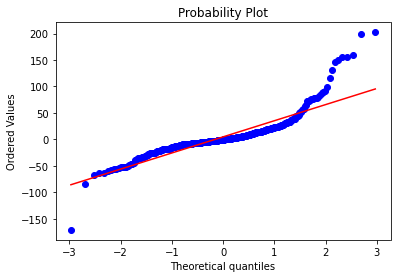

In [25]:
import scipy
scipy.stats.probplot(residue, dist="norm", plot=plt)
plt.show()

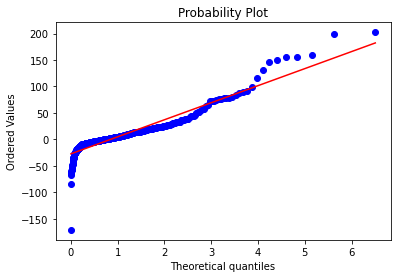

In [26]:
scipy.stats.probplot(residue, dist="expon", plot=plt)
plt.show()

In [27]:
import scipy.stats as sct

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [29]:
s = residue.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

In [30]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

# Out-of-samples Profit

In [31]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [32]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [33]:
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

22524.0

In [34]:
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

22460.0